In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
df = pd.read_csv('train_and_test2.csv')

In [33]:
sns.set(style="whitegrid")

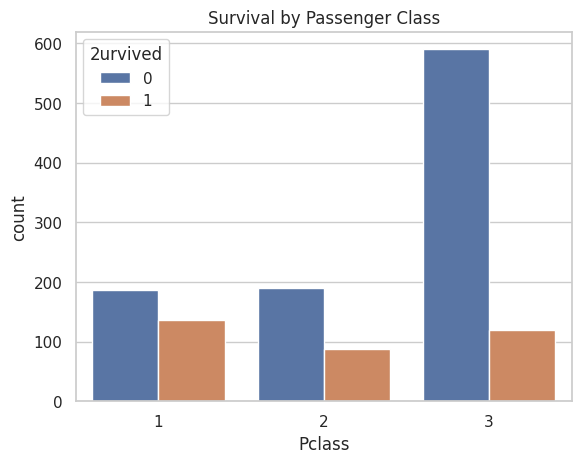

In [36]:
sns.countplot(data=df, x='Pclass', hue='2urvived')
plt.title("Survival by Passenger Class")
plt.show()

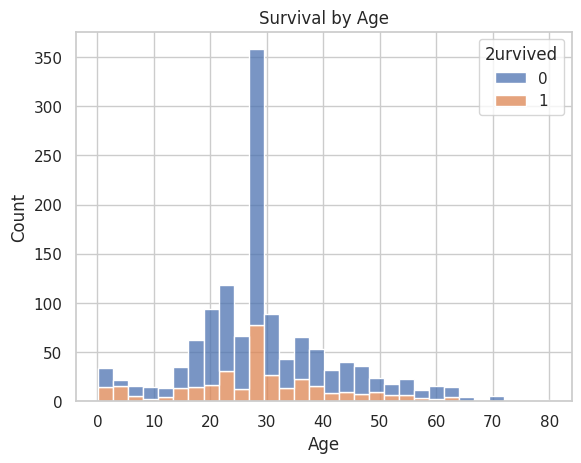

In [37]:
sns.histplot(data=df, x='Age', hue='2urvived', multiple="stack", bins=30)
plt.title("Survival by Age")
plt.show()

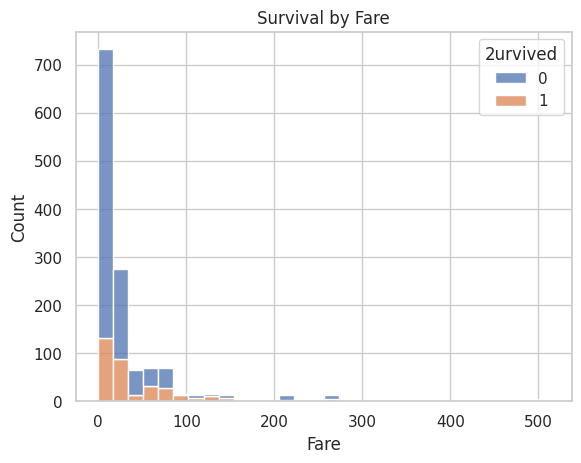

In [38]:
sns.histplot(data=df, x='Fare', hue='2urvived', multiple="stack", bins=30)
plt.title("Survival by Fare")
plt.show()

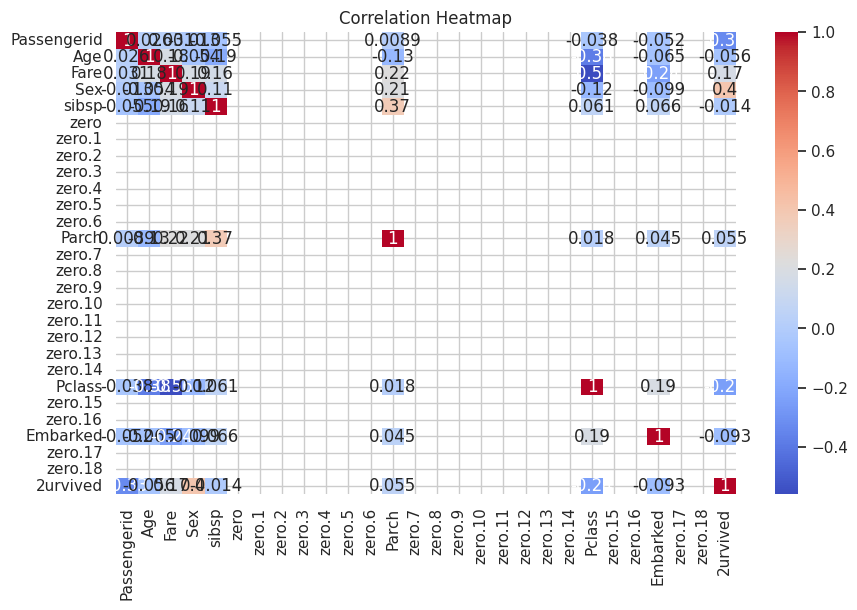

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [40]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [41]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [42]:
df['FamilySize'] = df['sibsp'] + df['Parch']

In [43]:
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)

In [44]:
df.drop(['sibsp', 'Parch'], axis=1, inplace=True)

In [45]:
X = df.drop('2urvived', axis=1)
y = df['2urvived']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [48]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  13]
 [ 20  53]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       189
           1       0.80      0.73      0.76        73

    accuracy                           0.87       262
   macro avg       0.85      0.83      0.84       262
weighted avg       0.87      0.87      0.87       262



In [50]:
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.30152672 0.59541985 0.37022901 0.86641221 0.74329502]
Average cross-validation score: 0.5753765610833261


In [51]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [26]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [52]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [62]:
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
acc2 = accuracy_score(y_test, y_pred_best)
print("Accuracy with best parameters:", acc2*100)
print(classification_report(y_test, y_pred_best))

Accuracy with best parameters: 88.93129770992367
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       189
           1       0.87      0.71      0.78        73

    accuracy                           0.89       262
   macro avg       0.88      0.84      0.85       262
weighted avg       0.89      0.89      0.89       262



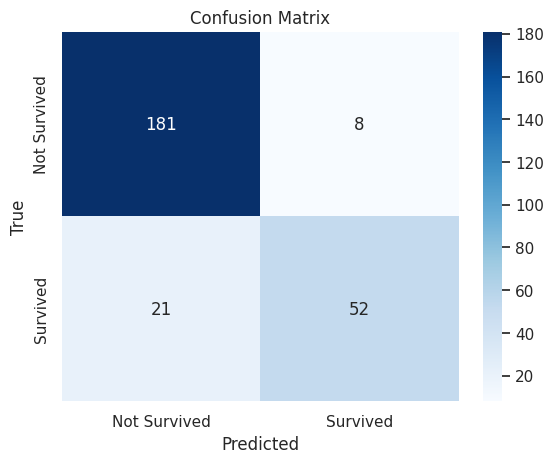

In [55]:
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

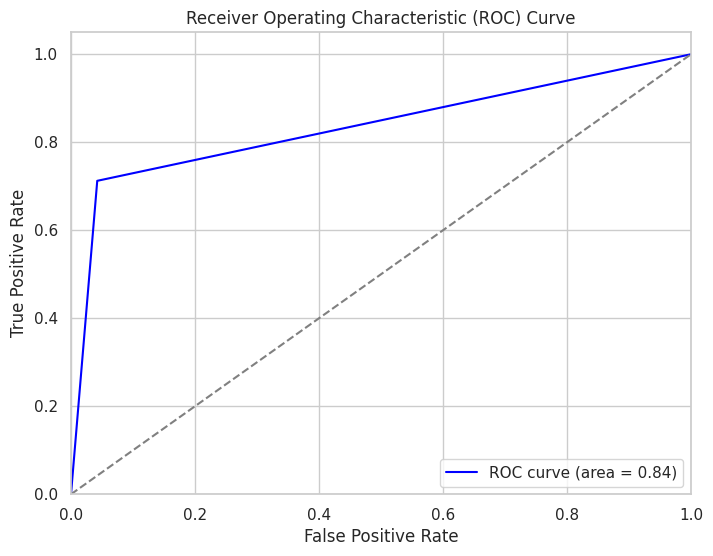

In [57]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()